## Utkarsha Vidhale
# Sales of Child Car Seats Analysis
Dataset : https://r-data.pmagunia.com/dataset/r-dataset-package-islr-carseats

This dataset is a part of ISLR package. I tried to perform some analysis in Python instead of R .



### Libraries used:

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from heatmap import heatmap, corrplot
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import math 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as SM

### Loading the dataset

In [2]:
df = pd.read_csv('Carseats.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [4]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

We will be trying to predict the sales of carseats. In this data set, a single observation represents a location where carseats are sold.

- Sales - Unit sales (in thousands) at each location 


- CompPrice - Price charged by competitor at each location 


- Income - Community income level (in thousands of dollars) 


- Advertising - Local advertising budget for company at each location (in thousands of dollars) 


- Population - Population size in region (in thousands) 


- Price - Price company charges for car seats at each site 


- ShelveLoc - A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site 


- Age - Average age of the local population 


- Education - Education level at each location 


- Urban - A factor with levels No and Yes to indicate whether the store is in an urban or rural location 


- US - A factor with levels No and Yes to indicate whether the store is in the US or not 


In [5]:
df_dummy = pd.get_dummies(df,drop_first=True)

In [6]:
df_dummy.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0


### Boxplots
#### Sales and ShelveLoc

<AxesSubplot:xlabel='ShelveLoc', ylabel='Sales'>

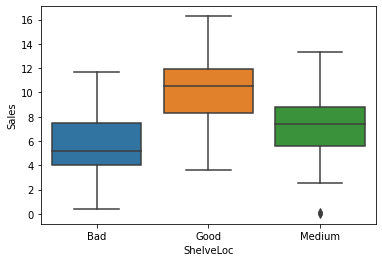

In [7]:
sns.boxplot(x='ShelveLoc' ,y='Sales' ,data=df)

#### Sales and Urban

<AxesSubplot:xlabel='Urban', ylabel='Sales'>

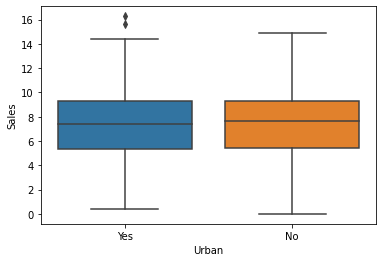

In [8]:
sns.boxplot(y='Sales' ,x='Urban' ,data=df)

#### Sales and US

<AxesSubplot:xlabel='US', ylabel='Sales'>

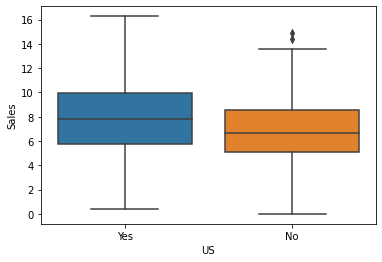

In [9]:
sns.boxplot(x='US' ,y='Sales' ,data=df)

### Correlating the quantitative variabls :

In [10]:
correlation_matrix = df.corr()
print(correlation_matrix)

                Sales  CompPrice    Income  Advertising  Population     Price  \
Sales        1.000000   0.064079  0.151951     0.269507    0.050471 -0.444951   
CompPrice    0.064079   1.000000 -0.080653    -0.024199   -0.094707  0.584848   
Income       0.151951  -0.080653  1.000000     0.058995   -0.007877 -0.056698   
Advertising  0.269507  -0.024199  0.058995     1.000000    0.265652  0.044537   
Population   0.050471  -0.094707 -0.007877     0.265652    1.000000 -0.012144   
Price       -0.444951   0.584848 -0.056698     0.044537   -0.012144  1.000000   
Age         -0.231815  -0.100239 -0.004670    -0.004557   -0.042663 -0.102177   
Education   -0.051955   0.025197 -0.056855    -0.033594   -0.106378  0.011747   

                  Age  Education  
Sales       -0.231815  -0.051955  
CompPrice   -0.100239   0.025197  
Income      -0.004670  -0.056855  
Advertising -0.004557  -0.033594  
Population  -0.042663  -0.106378  
Price       -0.102177   0.011747  
Age          1.000000   0

As compared to other variables, `Sales` have lowest correlation with `Population` followed by `Education` and `CompPrice`.


### Transforming variables

##### 1. `Population`

Text(0.5, 1.0, 'Sales & Population')

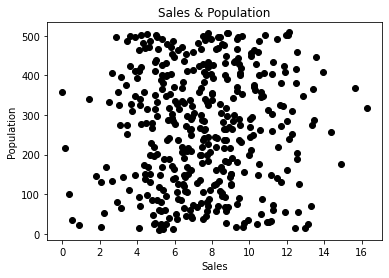

In [11]:
plt.plot(df['Sales'],df['Population'] , 'o', color='black');
plt.xlabel('Sales')
plt.ylabel('Population')
plt.title('Sales & Population')


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Population')

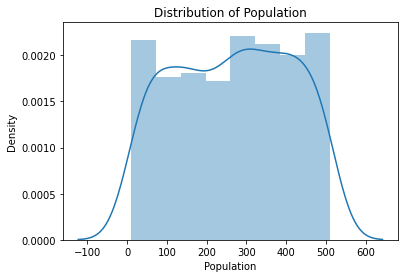

In [12]:
sns.distplot(df['Population'],kde=True).set_title('Distribution of Population')

 - Square Transformation:

In [13]:
Pop = df['Population']*df['Population']
r2 = np.corrcoef(df['Sales'], Pop)
print(r2)

[[1.         0.04163059]
 [0.04163059 1.        ]]


 - Inverse Transformation

In [14]:
Pop_inv = 1/df['Population']
r4 = np.corrcoef(df['Sales'], Pop)
print(r4)

[[1.         0.04163059]
 [0.04163059 1.        ]]


##### There is no change in the correlation between `Sales` and `Population` even after performing Square and Inverse transformation.

But from the business pont of view, `Sales` is an important variable. 

##### 2. `ComPprice`

Text(0.5, 1.0, 'Sales & CompPrice')

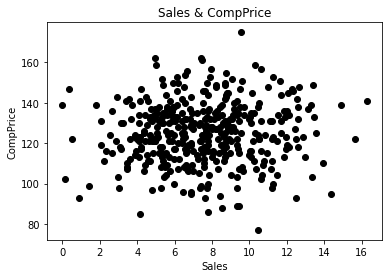

In [15]:
plt.plot(df['Sales'],df['CompPrice'] , 'o', color='black');
plt.xlabel('Sales')
plt.ylabel('CompPrice')
plt.title('Sales & CompPrice')


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of CompPrice')

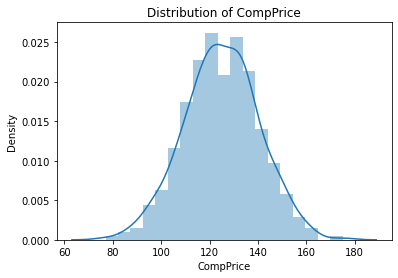

In [16]:
sns.distplot(df['CompPrice'],kde=True).set_title('Distribution of CompPrice')

 - Square Transformation:

In [17]:
comp = df['CompPrice']*df['CompPrice']
r2 = np.corrcoef(df['Sales'], comp)
print(r2)

[[1.         0.06988937]
 [0.06988937 1.        ]]


 - Inverse Transformation

In [18]:
comp_inv = 1/df['CompPrice']
r4 = np.corrcoef(df['Sales'], comp_inv)
print(r4)

[[ 1.         -0.04886374]
 [-0.04886374  1.        ]]


There is no change in the correlation between `Sales` and `CompPrice` even after performing Square and Inverse transformation. 
But from the business point of view, `CompPrice` is an important variable.
    

##### 5. `Education`

In [19]:
df.Education.value_counts()

17    49
12    49
11    48
10    48
16    47
13    43
18    40
14    40
15    36
Name: Education, dtype: int64

Education is ordinal variable with values ranging from 10 to 18.  

ANOVA test should be used to check the correlation between `Education` and `Sales`.

Text(0.5, 1.0, 'Sales and Edication')

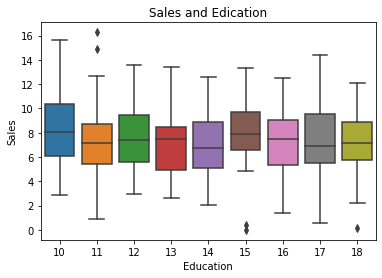

In [20]:
sns.boxplot(x='Education' ,y='Sales' ,data=df).set_title("Sales and Edication")

In [21]:
Edu = df['Education']
Sal = df['Sales']
model = ols('Edu ~ C(Sal)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Sal),2276.916667,335.0,0.939341,0.644242
Residual,463.083333,64.0,NaN,NaN


As the p value derieved is more than significance level, it can be stated that there is no significant association between `Sales` and `Education`. 

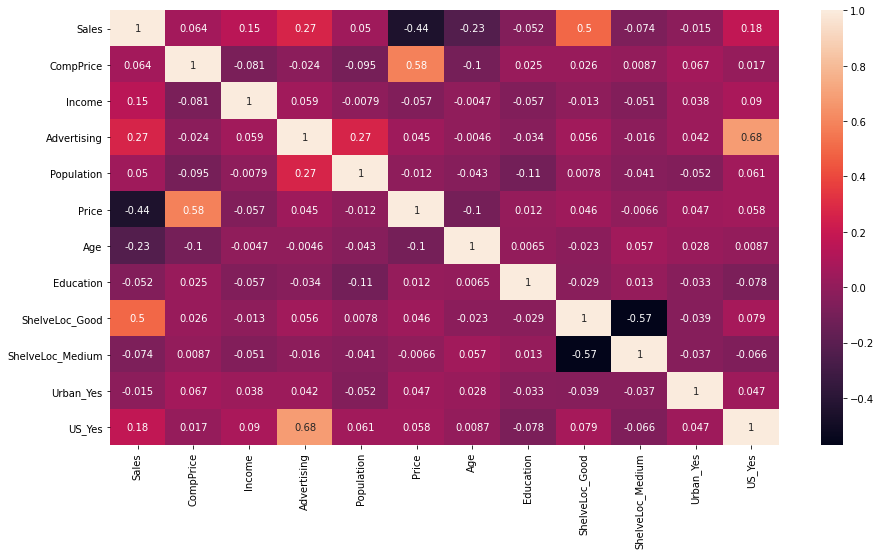

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(df_dummy.corr(),annot=True)
plt.show()

In [23]:
df_dummy.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0


#### We will use the whole data to perform basics of Exploratory Data Analysis and then use the data to build descriptive models.

##### Model using appropriate number of dummy variable levels.

In [24]:
formula_MLR_1 ='Sales~CompPrice+Income+Advertising+Population+Price+Age+Education+ShelveLoc_Good+ShelveLoc_Medium+Urban_Yes+US_Yes'

In [25]:
model_MLR_1 = SM.ols(formula=formula_MLR_1,data=df_dummy).fit()
model_MLR_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          1.60e-166
Time:                        12:29:31   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.6606      0.603      9.380      0.000       4.474       6.847
CompPrice            0.0928      0.004     22.378      0.000       0.085       0.101
Income               0.0158      0.002      8.565      0.000       0.012       0.019
Advertising          0.1231      0.011     11.066      0.000       0.101       0.145
Population           0.0002      0.000      0.561      0.575      -0.001       0.001
Price               -0.0954      0.003    -35.700      0.000      -0.101      -0.090
Age                 -0.0460      0.003    -14.472      0.000      -0.052      -0.040
Education           -0.0211      0.020     -1.070      0.285      -0.060       0.018
ShelveLoc_Good       4.8502      0.153     31.678      0.000       4.549       5.151
ShelveLoc_Medium     1.9567      0.126     15.516      0.000       1.709       2.205
Urban_Yes            0.1229      0.113      1.088      0.277      -0.099       0.345
US_Yes              -0.1841      0.150     -1.229      0.220      -0.479       0.111
==============================================================================
Omnibus:                        0.811   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.765
Skew:                           0.107   Prob(JB):                        0.682
Kurtosis:                       2.994   Cond. No.                     4.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We notice that the p-value for the t-statistic calculation for the `Population` variable is the highest (higher than 0.05).

For the $\underline{t-statistic}$ for every co-efficient of the Linear Regression the null and alternate Hypothesis is as follows:

${H_0}$ : The variable is significant. 

${H_1}$: The variable is not significant. 

Lower the p-value for the t-statistic more significant are the variables.

##### Model without the 'Population' variable

In [26]:
formula_MLR_2 = 'Sales~CompPrice+Income+Advertising+Price+Age+Education+ShelveLoc_Good+ShelveLoc_Medium+Urban_Yes+US_Yes'

In [27]:
model_MLR_2 = SM.ols(formula=formula_MLR_2,data=df_dummy).fit()
model_MLR_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     268.2
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          1.11e-167
Time:                        12:29:31   Log-Likelihood:                -569.15
No. Observations:                 400   AIC:                             1160.
Df Residuals:                     389   BIC:                             1204.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.7619      0.575     10.015      0.000       4.631       6.893
CompPrice            0.0926      0.004     22.436      0.000       0.084       0.101
Income               0.0158      0.002      8.560      0.000       0.012       0.019
Advertising          0.1250      0.011     11.844      0.000       0.104       0.146
Price               -0.0953      0.003    -35.736      0.000      -0.101      -0.090
Age                 -0.0461      0.003    -14.520      0.000      -0.052      -0.040
Education           -0.0224      0.020     -1.145      0.253      -0.061       0.016
ShelveLoc_Good       4.8467      0.153     31.709      0.000       4.546       5.147
ShelveLoc_Medium     1.9521      0.126     15.526      0.000       1.705       2.199
Urban_Yes            0.1189      0.113      1.055      0.292      -0.103       0.340
US_Yes              -0.1991      0.147     -1.351      0.177      -0.489       0.091
==============================================================================
Omnibus:                        0.899   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.826
Skew:                           0.111   Prob(JB):                        0.662
Kurtosis:                       3.012   Cond. No.                     2.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There is almost no change in the ${R^2}$ values. 


While adding or subtracting variables from a regression model to refine the model, we need to be very careful about the Adjusted ${R^2}$ values. Adding any particular value which is not significant can increase the ${R^2}$ value but the Adjusted ${R^2}$ changes by the addition or the subtraction of significant variables. 


Let us check the $R^2$ and adjusted $R^2$ values for the $1^{st}$ and $2^{nd}$ Multiple Linear Regression Model.

In [28]:
print('For the FIRST MLR model:','\n')

print('Rsquared         ',model_MLR_1.rsquared)
print('Adjusted Rsquared',model_MLR_1.rsquared_adj)

For the FIRST MLR model: 

Rsquared          0.8734133434127012
Adjusted Rsquared 0.8698245464475973


In [29]:
print('For the SECOND MLR model:','\n')

print('Rsquared         ',model_MLR_2.rsquared)
print('Adjusted Rsquared',model_MLR_2.rsquared_adj)

For the SECOND MLR model: 

Rsquared          0.8733106136278912
Adjusted Rsquared 0.8700538170630555


This means that the particular information about the store being located in the US does not help us in predicting the 'Sales' as compared to the other information that we have.

Let us see what happens when we drop a statistically significant variable from the model.

In this case,we will drop the `CompPrice` model.

In [30]:
formula_MLR_3 = 'Sales~Income+Advertising+Price+Age+Education+ShelveLoc_Good+ShelveLoc_Medium+Urban_Yes+US_Yes'

In [31]:
model_MLR_3 = SM.ols(formula=formula_MLR_3,data=df_dummy).fit()

In [32]:
model_MLR_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     105.8
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           6.29e-99
Time:                        12:29:31   Log-Likelihood:                -735.21
No. Observations:                 400   AIC:                             1490.
Df Residuals:                     390   BIC:                             1530.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           13.4510      0.699     19.243      0.000      12.077      14.825
Income               0.0134      0.003      4.820      0.000       0.008       0.019
Advertising          0.1087      0.016      6.821      0.000       0.077       0.140
Price               -0.0608      0.003    -18.446      0.000      -0.067      -0.054
Age                 -0.0500      0.005    -10.432      0.000      -0.059      -0.041
Education           -0.0125      0.030     -0.422      0.673      -0.071       0.046
ShelveLoc_Good       4.9019      0.231     21.204      0.000       4.447       5.356
ShelveLoc_Medium     2.0223      0.190     10.636      0.000       1.648       2.396
Urban_Yes            0.2621      0.170      1.540      0.124      -0.072       0.597
US_Yes              -0.0800      0.223     -0.359      0.720      -0.518       0.358
==============================================================================
Omnibus:                        0.242   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.886   Jarque-Bera (JB):                0.245
Skew:                           0.059   Prob(JB):                        0.885
Kurtosis:                       2.971   Cond. No.                     1.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As per our understanding, we see that both the Adjusted ${R^2}$ and the ${R^2}$ values have dropped massively. The p-values of t-statistic of certain variables have also changed. This indicates that as per the last iteration of the model a few values have become more important.  



Let us again the model before dropping any statistically significant variables.

In [33]:
model_MLR_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     268.2
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          1.11e-167
Time:                        12:29:31   Log-Likelihood:                -569.15
No. Observations:                 400   AIC:                             1160.
Df Residuals:                     389   BIC:                             1204.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.7619      0.575     10.015      0.000       4.631       6.893
CompPrice            0.0926      0.004     22.436      0.000       0.084       0.101
Income               0.0158      0.002      8.560      0.000       0.012       0.019
Advertising          0.1250      0.011     11.844      0.000       0.104       0.146
Price               -0.0953      0.003    -35.736      0.000      -0.101      -0.090
Age                 -0.0461      0.003    -14.520      0.000      -0.052      -0.040
Education           -0.0224      0.020     -1.145      0.253      -0.061       0.016
ShelveLoc_Good       4.8467      0.153     31.709      0.000       4.546       5.147
ShelveLoc_Medium     1.9521      0.126     15.526      0.000       1.705       2.199
Urban_Yes            0.1189      0.113      1.055      0.292      -0.103       0.340
US_Yes              -0.1991      0.147     -1.351      0.177      -0.489       0.091
==============================================================================
Omnibus:                        0.899   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.826
Skew:                           0.111   Prob(JB):                        0.662
Kurtosis:                       3.012   Cond. No.                     2.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let us now go ahead and drop the 'Urban_Yes' variable as that does not seem very statistically significant. 

In [34]:
formula_MLR_4 = 'Sales~CompPrice+Income+Advertising+Price+Age+Education+ShelveLoc_Good+ShelveLoc_Medium+US_Yes'

In [35]:
model_MLR_4 = SM.ols(formula=formula_MLR_4,data=df_dummy).fit()

In [36]:
model_MLR_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     297.7
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          1.09e-168
Time:                        12:29:31   Log-Likelihood:                -569.72
No. Observations:                 400   AIC:                             1159.
Df Residuals:                     390   BIC:                             1199.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.8140      0.573     10.142      0.000       4.687       6.941
CompPrice            0.0929      0.004     22.529      0.000       0.085       0.101
Income               0.0158      0.002      8.598      0.000       0.012       0.019
Advertising          0.1253      0.011     11.868      0.000       0.105       0.146
Price               -0.0953      0.003    -35.721      0.000      -0.101      -0.090
Age                 -0.0460      0.003    -14.488      0.000      -0.052      -0.040
Education           -0.0231      0.020     -1.180      0.239      -0.062       0.015
ShelveLoc_Good       4.8339      0.152     31.721      0.000       4.534       5.133
ShelveLoc_Medium     1.9422      0.125     15.489      0.000       1.696       2.189
US_Yes              -0.1968      0.147     -1.336      0.182      -0.486       0.093
==============================================================================
Omnibus:                        0.872   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.647   Jarque-Bera (JB):                0.832
Skew:                           0.112   Prob(JB):                        0.660
Kurtosis:                       2.989   Cond. No.                     2.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Almost no change in the ${R^2}$ and Adjusted ${R^2}$ is observed thus confirming the fact that the variable was indeed not significant.

Now we will check the diagnostics of the model after dropping the 'Education' variable as that does not seem significant.

In [37]:
formula_MLR_5 = 'Sales~CompPrice+Income+Advertising+Price+Age+ShelveLoc_Good+ShelveLoc_Medium+Urban_Yes'

In [38]:
model_MLR_5 = SM.ols(formula=formula_MLR_5,data=df_dummy).fit()

In [39]:
model_MLR_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     334.0
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          1.43e-169
Time:                        12:29:31   Log-Likelihood:                -570.65
No. Observations:                 400   AIC:                             1159.
Df Residuals:                     391   BIC:                             1195.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.4316      0.507     10.723      0.000       4.436       6.428
CompPrice            0.0923      0.004     22.359      0.000       0.084       0.100
Income               0.0157      0.002      8.547      0.000       0.012       0.019
Advertising          0.1155      0.008     14.946      0.000       0.100       0.131
Price               -0.0954      0.003    -35.715      0.000      -0.101      -0.090
Age                 -0.0463      0.003    -14.555      0.000      -0.053      -0.040
ShelveLoc_Good       4.8485      0.153     31.702      0.000       4.548       5.149
ShelveLoc_Medium     1.9622      0.126     15.608      0.000       1.715       2.209
Urban_Yes            0.1206      0.113      1.070      0.285      -0.101       0.342
==============================================================================
Omnibus:                        0.775   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.679   Jarque-Bera (JB):                0.778
Skew:                           0.106   Prob(JB):                        0.678
Kurtosis:                       2.961   Cond. No.                     1.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above model we can thus conclude that the Education level at location of the store is not a significant variable when it comes to predicting the sales.

From the p-value of the $t_{statistic}$ of 'Urban_Yes', the variable does not seem significant. We will run the model by dropping the variable and then we will again check the values of $R^2$ and adjusted $R^2$.

In [40]:
formula_MLR_6 = 'Sales~CompPrice+Income+Advertising+Price+Age+ShelveLoc_Good+ShelveLoc_Medium'

In [41]:
model_MLR_6 = SM.ols(formula=formula_MLR_6,data=df_dummy).fit()

In [42]:
model_MLR_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     381.4
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          1.25e-170
Time:                        12:29:31   Log-Likelihood:                -571.24
No. Observations:                 400   AIC:                             1158.
Df Residuals:                     392   BIC:                             1190.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.4752      0.505     10.842      0.000       4.482       6.468
CompPrice            0.0926      0.004     22.451      0.000       0.084       0.101
Income               0.0158      0.002      8.590      0.000       0.012       0.019
Advertising          0.1159      0.008     15.006      0.000       0.101       0.131
Price               -0.0953      0.003    -35.699      0.000      -0.101      -0.090
Age                 -0.0461      0.003    -14.521      0.000      -0.052      -0.040
ShelveLoc_Good       4.8357      0.152     31.710      0.000       4.536       5.135
ShelveLoc_Medium     1.9520      0.125     15.569      0.000       1.706       2.198
==============================================================================
Omnibus:                        0.766   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.682   Jarque-Bera (JB):                0.810
Skew:                           0.104   Prob(JB):                        0.667
Kurtosis:                       2.929   Cond. No.                     1.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We see that the $R^2$ and adjusted $R^2$ values does not change much if we drop the 'Urban_Yes' variable.


Let us drop the 'Income' variable once and run the model.

In [43]:
formula_MLR_7 = 'Sales~CompPrice+Advertising+Price+Age+ShelveLoc_Good+ShelveLoc_Medium'

In [44]:
model_MLR_7 = SM.ols(formula=formula_MLR_7,data=df_dummy).fit()

In [45]:
model_MLR_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     365.1
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          2.79e-157
Time:                        12:29:31   Log-Likelihood:                -605.73
No. Observations:                 400   AIC:                             1225.
Df Residuals:                     393   BIC:                             1253.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.8830      0.520     13.236      0.000       5.861       7.905
CompPrice            0.0907      0.004     20.225      0.000       0.082       0.099
Advertising          0.1199      0.008     14.287      0.000       0.103       0.136
Price               -0.0957      0.003    -32.918      0.000      -0.101      -0.090
Age                 -0.0464      0.003    -13.415      0.000      -0.053      -0.040
ShelveLoc_Good       4.7686      0.166     28.761      0.000       4.443       5.095
ShelveLoc_Medium     1.8767      0.136     13.783      0.000       1.609       2.144
==============================================================================
Omnibus:                        1.637   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.728
Skew:                           0.140   Prob(JB):                        0.422
Kurtosis:                       2.842   Cond. No.                     1.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let us drop the `Age` variable.

In [46]:
formula_MLR_8 = 'Sales~CompPrice+Advertising+Price+ShelveLoc_Good+ShelveLoc_Medium'

In [47]:
model_MLR_8 = SM.ols(formula=formula_MLR_8,data=df_dummy).fit()

In [48]:
model_MLR_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     276.5
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          2.00e-126
Time:                        12:29:31   Log-Likelihood:                -681.12
No. Observations:                 400   AIC:                             1374.
Df Residuals:                     394   BIC:                             1398.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.8444      0.564      6.810      0.000       2.735       4.954
CompPrice            0.0937      0.005     17.366      0.000       0.083       0.104
Advertising          0.1203      0.010     11.884      0.000       0.100       0.140
Price               -0.0936      0.003    -26.741      0.000      -0.100      -0.087
ShelveLoc_Good       4.7293      0.200     23.657      0.000       4.336       5.122
ShelveLoc_Medium     1.7728      0.164     10.814      0.000       1.450       2.095
==============================================================================
Omnibus:                        0.010   Durbin-Watson:                   2.208
Prob(Omnibus):                  0.995   Jarque-Bera (JB):                0.009
Skew:                           0.005   Prob(JB):                        0.996
Kurtosis:                       2.979   Cond. No.                     1.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Only for Predictive purposes of Linear Regression
If we only wanted to predict using Linear Regression and was not looking for the model building aspect of it, we can do that as well. For this exercise, we will use the same variables as of Model 1, Model 6, Model 7 and Model 8.

First we will split the data into train and test. We will build the model on the training data and check the RMSE on the test data.

In [49]:
lr = LinearRegression()

Splitting the data into the dependent and independent variables.

In [50]:
X = df_dummy[['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes']].copy()
Y = df_dummy['Sales']

Splitting the data into train (70%) and test (30%).

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

###### Using only Model 1 variables to build the model on the training data and predict on the training as well as test data

In [53]:
model_1 = lr.fit(X_train[['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes']],Y_train)
#We are only using Linear Regression as a predictive tool and not a descriptive tool

In [54]:
#Training Data Prediction

model_1_pred_train = model_1.predict(X_train[['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes']])

In [55]:
#Test Data Prediction

model_1_pred_test = model_1.predict(X_test[['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes']])

In [56]:
print('Training Data RMSE of model_1:',metrics.mean_squared_error(Y_train,model_1_pred_train))
print('Test Data     RMSE of model_1:',metrics.mean_squared_error(Y_test,model_1_pred_test))

Training Data RMSE of model_1: 1.0149047107984177
Test Data     RMSE of model_1: 1.0590155450860237


##### Using only Model 6 variables to build the model on the training data and predict on the training as well as test data.

In [57]:
model_6 = lr.fit(X_train[['CompPrice', 'Income', 'Advertising', 'Price',
       'Age', 'ShelveLoc_Good', 'ShelveLoc_Medium']],Y_train)

In [58]:
#Training Data Prediction

model_6_pred_train = model_6.predict(X_train[['CompPrice', 'Income', 'Advertising', 'Price',
       'Age', 'ShelveLoc_Good', 'ShelveLoc_Medium']])

In [59]:

#Test Data Prediction

model_6_pred_test = model_6.predict(X_test[['CompPrice', 'Income', 'Advertising', 'Price',
       'Age', 'ShelveLoc_Good', 'ShelveLoc_Medium']])

In [60]:
print('Training Data RMSE of model_6:',metrics.mean_squared_error(Y_train,model_6_pred_train))
print('Test Data     RMSE of model_6:',metrics.mean_squared_error(Y_test,model_6_pred_test))

Training Data RMSE of model_6: 1.0346873676133173
Test Data     RMSE of model_6: 1.0228768932659837


##### Using only Model 7 variables to build the model on the training data and predict on the training as well as test data.

In [61]:
model_7 = lr.fit(X_train[['CompPrice','Advertising', 'Price',
       'Age', 'ShelveLoc_Good', 'ShelveLoc_Medium']],Y_train)

In [62]:
#Training Data Prediction

model_7_pred_train = model_7.predict(X_train[['CompPrice','Advertising', 'Price',
       'Age', 'ShelveLoc_Good', 'ShelveLoc_Medium']])

In [63]:

#Test Data Prediction

model_7_pred_test = model_7.predict(X_test[['CompPrice','Advertising', 'Price',
       'Age', 'ShelveLoc_Good', 'ShelveLoc_Medium']])

In [64]:
print('Training Data RMSE of model_7:',metrics.mean_squared_error(Y_train,model_7_pred_train))
print('Test Data     RMSE of model_7:',metrics.mean_squared_error(Y_test,model_7_pred_test))

Training Data RMSE of model_7: 1.1799669367495877
Test Data     RMSE of model_7: 1.3258332408651667


##### Using only Model 8 variables to build the model on the training data and predict on the training as well as test data.

In [65]:
model_8 = lr.fit(X_train[['CompPrice','Advertising', 'Price',
       'Age', 'ShelveLoc_Good']],Y_train)

In [66]:

#Training Data Prediction

model_8_pred_train = model_8.predict(X_train[['CompPrice','Advertising', 'Price',
       'Age', 'ShelveLoc_Good']])

In [67]:

#Test Data Prediction

model_8_pred_test = model_8.predict(X_test[['CompPrice','Advertising', 'Price',
       'Age', 'ShelveLoc_Good']])

In [68]:
print('Training Data RMSE of model_8:',metrics.mean_squared_error(Y_train,model_8_pred_train))
print('Test Data     RMSE of model_8:',metrics.mean_squared_error(Y_test,model_8_pred_test))

Training Data RMSE of model_8: 1.8832046817645829
Test Data     RMSE of model_8: 1.6118205782799389


#### Scatteplot for the predictions

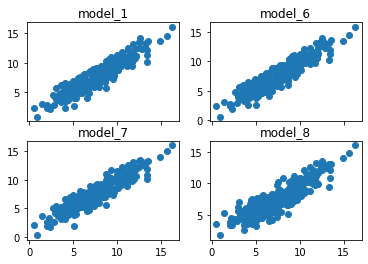

In [69]:

# Training Data

f,a =  plt.subplots(2,2,sharex=True)
a[0][0].scatter(Y_train,model_1_pred_train)
a[0][0].set_title('model_1')
a[0][1].scatter(Y_train,model_6_pred_train)
a[0][1].set_title('model_6')
a[1][0].scatter(Y_train,model_7_pred_train)
a[1][0].set_title('model_7')
a[1][1].scatter(Y_train,model_8_pred_train)
a[1][1].set_title('model_8')
plt.show()

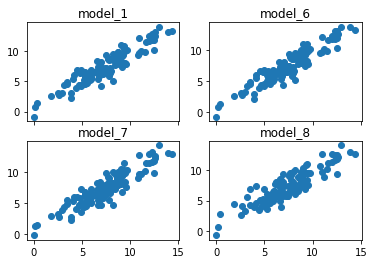

In [70]:
# Test Data

f,a =  plt.subplots(2,2,sharex=True)
a[0][0].scatter(Y_test,model_1_pred_test)
a[0][0].set_title('model_1')
a[0][1].scatter(Y_test,model_6_pred_test)
a[0][1].set_title('model_6')
a[1][0].scatter(Y_test,model_7_pred_test)
a[1][0].set_title('model_7')
a[1][1].scatter(Y_test,model_8_pred_test)
a[1][1].set_title('model_8')
plt.show()